<a href="https://colab.research.google.com/github/Bast-94/ML-BIO/blob/exercice-12/exercice_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 12:

[lien Nowledgeable](https://nowledgeable.com/invitation/student/join-module/9c8ec467-686a-44cd-a2f2-85cf174a79ad)
1. Tester un modèle de convolution 1D sans faire des extractions de features.

2. Tester un classifier avec et sans faire la transformée en ondelettes pour savoir si le modèle donne une meilleur résultat avec la transformée en ondelettes ?

3. Tester des modèles de classification différentes  comme RadomForest, ExtraTrees, GradientBoosting, etc.

4. Tester des différentes familles d'ondelettes comme Symlets, Coiflets, Biorthogonal etc.

5. Tester d'autres features (vous pouvez vous référer des listes de features avec des librairies tsfresh ou tsfel )

6. A l'aide de la transformée en ondelettes continue, transformez des signaux ECG en scaleograms et puis utilisez un modèle CNN pour classifier des images.


In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

import wfdb
import glob
import os
import pywt

In [7]:
def load_signal_using_wfdb(file, start, end, channel, pn_dir):
    """
    file: name of record
    start: int
    end:int
    channel: 0 or 1
    """
    record = wfdb.rdrecord(file, sampfrom = start, sampto = end, channels=[channel], pn_dir=pn_dir)
    data = record.p_signal.reshape(-1)
    return data


In [34]:
signal_test = load_signal_using_wfdb('205', start=0, end=1000, channel = 0, pn_dir='mitdb')
waveletname = 'morl'
scales = range(1, 128)
coeff, freqs = pywt.cwt(signal_test, scales, waveletname, 1)

(127, 1000)


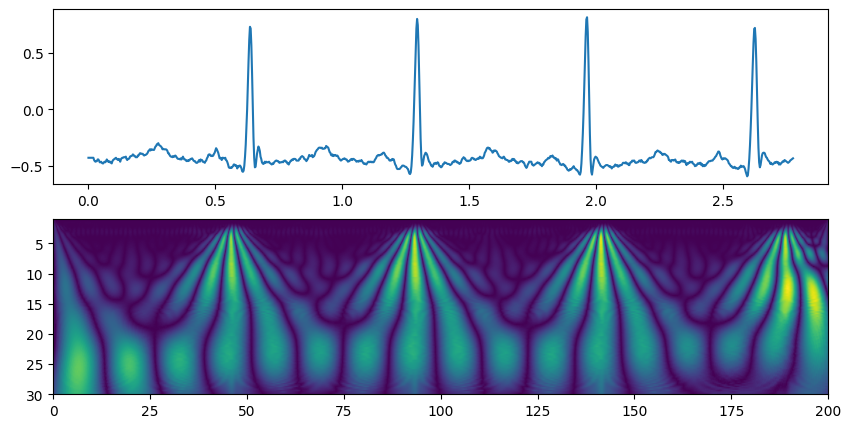

In [35]:
print(coeff.shape)
N = signal_test.size
sr = 360
dt = 1/sr
time = np.arange(0, N)*dt
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 5))
ax1.plot(time, signal_test)
im = ax2.imshow(abs(coeff), extent = [0, 200, 30, 1],
                interpolation = 'bilinear', aspect = 'auto')


In [37]:
coeff[:,:127].shape

(127, 127)